ЛАБОРАТОРНАЯ РАБОТА 6.1

In [209]:
import numpy as np

Вариант 5

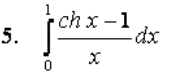

In [210]:
def f(x):
  return (np.cosh(x) - 1) / x

Для начала подготовлю функции вычисления интеграла

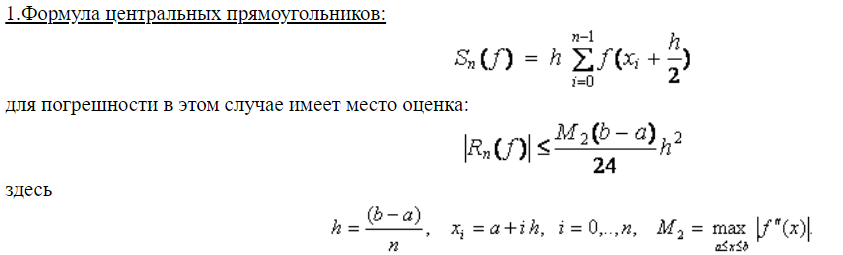

In [211]:
eps = 10**(-30)
def str_rect(a, b, razb):
    a += eps
    b -= eps
    h = (b-a)/razb
    ret = 0
    xi = a
    while xi < b :
        ret = ret + h*f(xi + h/2)
        xi = xi + h
    return ret
    

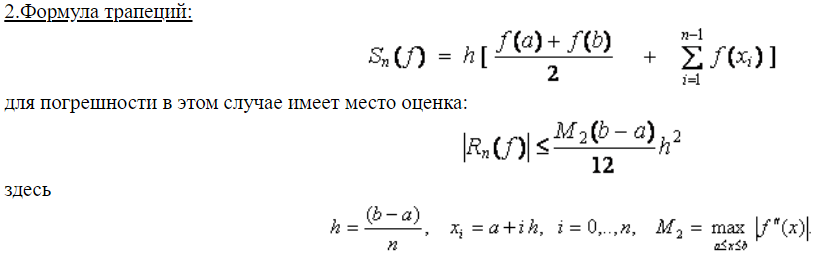

In [212]:
def trap(a, b, n):
    a += eps
    b -= eps
    h = (b - a)/n
    ret = (f(a) + f(b))/2
    xi = a + h
    while xi < b :
        ret = ret + f(xi)
        xi = xi + h
    return h*ret

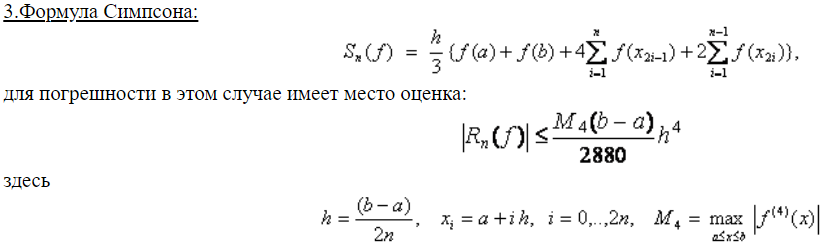


In [213]:
def simpson(a, b, n):
    a += eps
    b -= eps
    h = (b - a) / (2*n)
    ret = f(a) + f(b)
    for i in range(1, n + 1):
        xi = a + (2*i - 1)*h
        ret = ret + 4*f(xi)
        if i != n:
            ret = ret + 2*f(xi + h)
    return (h/3)*ret

Сравнение трех методов

In [214]:
print('Правильный ответ =', 0.2606512760786753)
print('Формула центральных прямоугольников = ', str_rect(0, 1, 100))
print('Формула трапеций = ', trap(0, 1, 100))
print('Формула Симпсона = ', simpson(0, 1, 100))

Правильный ответ = 0.2606512760786753
Формула центральных прямоугольников =  0.2606507255774247
Формула трапеций =  0.2606523770821008
Формула Симпсона =  0.2606512760789834


Ближе всех к правильному ответу метод Симпсона

2) Вычислить функцию, используя составленную программу.

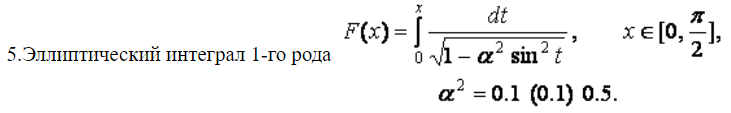

In [215]:
def f(x):
    return 1/np.sqrt(1-0.1*0.1*np.sin(x)*np.sin(x))

In [216]:
x = 0
h = np.pi/(2*10)
for i in range(11):
    print('x =', x)
    print('Формула центральных прямоугольников = ', str_rect(0, x, 100))
    print('Формула трапеций = ', trap(0, x, 100))
    print('Формула Симпсона = ', simpson(0, x, 100))
    x = x + h
    print('_____')

x = 0
Формула центральных прямоугольников =  0
Формула трапеций =  -2e-32
Формула Симпсона =  -1.9999999999999998e-30
_____
x = 0.15707963267948966
Формула центральных прямоугольников =  0.15708606106827175
Формула трапеций =  0.15708606154498994
Формула Симпсона =  0.15708606122717791
_____
x = 0.3141592653589793
Формула центральных прямоугольников =  0.3142099526564703
Формула трапеций =  0.31420995628742754
Формула Симпсона =  0.31420995386678935
_____
x = 0.47123889803846897
Формула центральных прямоугольников =  0.47612317518366226
Формула трапеций =  0.4761231413163069
Формула Симпсона =  0.4714058810166876
_____
x = 0.6283185307179586
Формула центральных прямоугольников =  0.6287011081934565
Формула трапеций =  0.6287011317820509
Формула Симпсона =  0.6287011160563211
_____
x = 0.7853981633974483
Формула центральных прямоугольников =  0.7939871665282902
Формула трапеций =  0.7939870499931626
Формула Симпсона =  0.7861133335696746
_____
x = 0.9424777960769379
Формула центральных 

ЛАБОРАТОРНАЯ РАБОТА 6.2

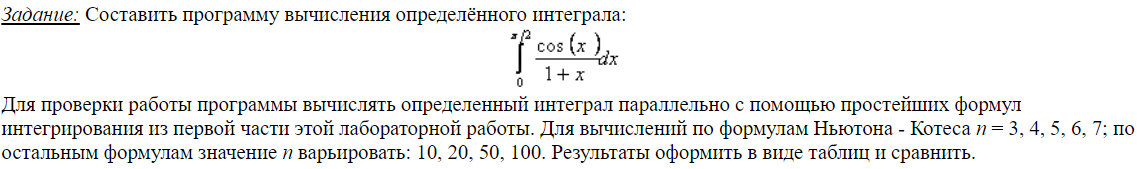

In [217]:
def f(x):
    return np.cos(x)/(1+x)

In [218]:
for n in [10, 20, 50, 100]:
    print('n =', n)
    print('Формула центральных прямоугольников = ', str_rect(0, np.pi/2, n))
    print('Формула трапеций = ', trap(0, np.pi/2, n))
    print('Формула Симпсона = ', simpson(0, np.pi/2, n))
    print('_____')

n = 10
Формула центральных прямоугольников =  0.672995135677554
Формула трапеций =  0.6748749095544018
Формула Симпсона =  0.6736217269698365
_____
n = 20
Формула центральных прямоугольников =  0.6734641911278991
Формула трапеций =  0.673935022615978
Формула Симпсона =  0.6736211349572586
_____
n = 50
Формула центральных прямоугольников =  0.6735959715915077
Формула трапеций =  0.6736713449067365
Формула Симпсона =  0.6736210960299175
_____
n = 100
Формула центральных прямоугольников =  0.6735669710900619
Формула трапеций =  0.673633658249122
Формула Симпсона =  0.673621095067923
_____


Нi - коэффициенты Ньютона - Котеса

In [219]:
H = [
     [0],
     [1/2, 1/2],
     [1/6, 2/3, 1/6],
     [1/8, 3/8, 3/8, 1/8],
     [7/90, 32/90, 12/90, 32/90, 7/90],
     [19/288, 25/96, 25/144, 25/96, 25/96, 19/288],
     [41/840, 9/35, 9/280, 34/105, 9/280, 9/35, 41/840],
     [751/17280, 3577/17280, 1323/17280, 2989/17280, 2989/17280, 1323/17280, 3577/17280, 751/17280]
]

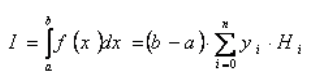

In [220]:
def newton_cotes(a, b, n):
    h = (b-a)/n
    xi = a + h
    ret = 0
    for i in range(0, n + 1):
        xi = a + i*h
        ret = ret + f(xi)*H[n][i]
    return (b-a)*ret
    

In [221]:
for n in [3, 4, 5, 6, 7]:
  print(f"n = {n}")
  print("Формула Ньютона-Котеса: ", newton_cotes(0, np.pi / 2, n))

n = 3
Формула Ньютона-Котеса:  0.67503643203685
n = 4
Формула Ньютона-Котеса:  0.6737464252343194
n = 5
Формула Ньютона-Котеса:  0.7149550907369442
n = 6
Формула Ньютона-Котеса:  0.6736283189076623
n = 7
Формула Ньютона-Котеса:  0.6736257050724141
